In [836]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy
import re
import math
from IPython.display import Image

### Group theory foundations

A group $G$ is a collection of elements plus a binary operation which satisfies a few simple rules. We represent the binary operation using either a dot: $a \cdot b$ or by just writing the two elements next to each other: $ab$

If there's an element $e$ such that $ea = a$ for every other element $a$, then we call $e$ the identity element. Often we write $1$ instead of $e$, since $1$ is the identity element in the usual multiplication of real numbers.

If two elements multiplied together equals $1$, then we say the elements are inverses. That is, if $ab = 1$ then we say $a$ and $b$ are inverses, and we write $a^{-1} = b$ and $b^{-1} = a$.

Now, the rules to be a group are:

1. Transitivity: $(ab)c = a(bc)$
2. The identity exists: there is an element $1$ such that $1a = a$ for every element $a$
3. Inverses exist: for every element $a$, there exists an element $a^{-1}$ such that $aa^{-1} = 1$

If these rules hold for every element in the set $G$, then $G$ is a group.

The first two examples show that groups are present in mathematical objects that we're all familiar with.
Note: although I tend to think of the binary operation as multiplication, it can also be addition, string concatenation, or any other operation that takes two elements of $G$ and returns one element of $G$. All we need to make it a group is for the 3 rules above to hold.

---

**Example 1**: the set of real numbers, with usual multiplication as the operation. But we have to take 0 out of the set, because 0 has no multiplicative inverse (breaking rule 3).

**Example 2**: the set of integers, with addition as the operation (we can't use multiplication because, for example, there's no integer $n$ such that $2n = 1$, breaking rule 3). Note when we use addition as the operation $0$ is the identity element, because $0 + n = n$ for every integer $n$.

---

The next two examples are foundational in group theory but are probably unfamiliar if you've never seen abstract algebra.

**Example 3**: Let G = {0, 1, 2, 3, 4}. The operation on $G$ is addition modulo 5 - that is, $(a + b) \pmod 5$. This means that we first add $a$ and $b$ as usual, then take the remainder when divided by 5. To make it easier to read we'll use $+$ to denote the operation on $G$. For example: 

$2 + 3$ = $(2 + 3) \pmod 5$ = $5 \pmod 5 = 0$

$4 + 3$ = $(4 + 3) \pmod 5$ = $7 \pmod 5 = 2$

$0 + 1$ = $(0 + 1) \pmod 5$ = $1 \pmod 5 = 1$

Note that $0$ is still the identity of this operation, just as in usual addition. Identities still exist because we can always add $n$ to $5 - n$ to get $5 \pmod 5 = 0%. And transitivity holds because it holds for usual addition as well. Therefore, $G$ is a group. Note this is a finite group, unlike the first 2 examples.

Further, we can extend this example to a whole family of finite groups. Let $n$ be any positive integer and define $G = {0, 1, 2, ... , n-1}$. Then $G$ is a group under the operation of addition modulo $n$ and we denote it as $G = \mathbb{Z}_n$.

**Example 4**: For the last example we'll actually give a binary operation on groups themselves - i.e. a way to construct a new group from a pair of groups. (The set of groups is *not* itself a group under this operation, unfortunately - but this will give us a whole new class of finite groups.)

Let $G$ and $H$ be two groups. Let $G \times H$ be the Cartesian product of $G$ and $H$ - that is, $G \times H$ consists of all *pairs* of the form $(g, h)$ where $g$ is an element of $G$ and $h$ is an element of $H$. Then to multiply two of these pairs, we simply multiply the elements in the first coordinate of each pair, and multiply the elements in the second coordinate of each pair separately:

$(g_1, h_1)(g_2, h_2) = (g_1 g_2, h_1 h_2)$

Since $G$ and $H$ are groups, you can check that this operation makes $G \times H$ into a group. Transitivity holds because it holds in both coordinates; the identity is $(1_G, 1_H)$ where $1_G$ is the identity of $G$ and $1_H$ is the identity of $H$; and the inverse of $(g, h)$ is $(g^{-1}, h^{-1})$.

Now, we can multiply any of the groups discussed above to get new groups. In particular, let $G = \mathbb{Z}_n$ and $H = \mathbb{Z}_m$. By multiplying them together we get a new finite group $\mathbb{Z}_n \times \mathbb{Z}_m$ which has $n \cdot m$ elements.

### Group presentations

Groups can be defined by explicitly describing the elements and the operation, like we did above. But a more efficient way is to specify a few *starting elements*, which we call *generators*, and *multiplication rules*, which we call *relations*. This kind of description is called a *presentation* of the group, and is best illustrated with an example.

Let $G$ have a single generator, which we'll call $x$. By the definition of a group, $G$ also has an identity element $1$. Let's impose the single relation $xxxxx = 1$. To simplify the notation, let's agree to write 

$x^1 = x$

$x^2 = xx$

$x^3 = xxx$

and so on - then we can write this relation more simply as $x^5 = 1$.

Now, what kind of a group is $G$? To answer this, we need to figure out what the other elements of $G$ are. We have $1$ and $x$. We also know $G$ is a group - which means we can multiply any two elements together. Multiplying $x$ and $1$ just gives us $x$ - that's the definition of $1$. So all we can do is multiply $x$ by itself to get $x^2$. Now we have 3 elements: $1, x, x^2$. But we're not done yet - we can multiply *any* two elements in $G$, so let's multiply $x^2$ by $x$ to get $x^3$. Then we can multiply $x^3$ by $x$ to get $x^4$, and $x^4$ by $x$ to get $x^5$. Here we run into the relation $x^5 = 1$. If we keep multiplying by $x$ we run into an infinite loop: 

$x^6 = x^5x = 1x = x$

$x^7 = x^5x^2 = 1x^2 = x^2$

and so on, and we never get any more new elements.

So, multiplying x by itself gave us the following elements: $1, x, x^2, x^3, x^4$. Are there any more? Well, multiplying $1$ by other things won't give us anything new. The only other thing to try is to multiply $x^n$ and $x^m$, but this just gives us $x^{n + m}$, and after we subtract all the 5's from $n + m$ we'll wind up with one of the 5 elements listed above. For example, $x^4x^3 = x^7 = x^5x^2 = 1x^2 = x^2$. So these are *all* the elements in the group.

In fact, the multiplication in this group works exactly the same way as the addition operation in the group $\mathbb{Z}_5$ from the example above, because every time we have $x^5$ we can remove it. Compare the following two equations:

$x^n x^m = x^{(n+m) \pmod 5}$

$n + m = (n+m) \pmod 5$

These two operations work exactly the same - the only difference is that we're writing the elements in different ways. This relationship is called *isomorphism*. The group we just constructed using a *presentation* isomorphic to the group $\mathbb{Z}_5$. A careful definition of isomorphism isn't needed here - just the concept that there are multiple ways to describe what is essentially the same group.

We can express this in the following way: $\mathbb{Z}_5 = \left\langle x \ \big| \ x^5 = 1 \right\rangle$. This says if we start with a single generator $x$, and impose a single relation $x^5 = 1$, then the group we get as a result is isomorphic to $\mathbb{Z}_5$. By generalizing our reasoning above, we can see that for any positive integer $n$, we have $\mathbb{Z}_n = \left\langle x \ \big| \ x^n = 1 \right\rangle$.

The groups $\mathbb{Z}_n \times \mathbb{Z}_m$ can also be described using group presentations. Let $x, y$ be two distinct generators. As you might guess, we will set $x^n = 1$ to represent the first group $\mathbb{Z}_n$, and $y^m = 1$ to represent the second group $\mathbb{Z}_m$. But we need one more relation: $xy = yx$. This says that we can change the order of $x$ and $y$ whenever they're next to each other, hence we can move all the $x$'s to the left and all the $y$'s to the right. Then the elements of this group can be written in the form $x^ay^b$ where $a$ is an integer between $0$ and $n-1$ and $b$ is an integer between $0$ and $m-1$. This corresponds exactly to the element $(a, b)$ of $\mathbb{Z}_n \times \mathbb{Z}_m$. Compare the following two equations:

$(x^{a_1}y^{b_1})(x^{a_2}y^{b_2}) = x^{a_1}x^{a_2}y^{b_1}y^{b_2} = x^{(a_1 + a_2) \pmod n}y^{(b_1 + b_2) \pmod m}$

$(a_1, b_1)(a_2, b_2) = (a_1 + a_2 \pmod n, \ b_1 + b_2 \pmod m)$

Although the first operation is in the presented group and the second operation is in $\mathbb{Z}_n \times \mathbb{Z}_m$, we can see that the operation has exactly the same effect on the corresponding elements. Again, the difference is merely a relabeling of the group elements, so the two groups are isomorphic and we write:

$\mathbb{Z}_n \times \mathbb{Z}_m = \left\langle x, y \ \big| \ x^n = 1, \ y^m = 1, \ xy = yx \right\rangle$


### The graph of a group presentation

Given a presentation, we can produce its Cayley graph, which is a highly symmetrical and beautiful graph that illustrates how the groups' elements flow out of the generating elements and are constrained by the group relations. The rules to construct a Cayley graph are simple:

1. Each vertex of the graph corresponds to an element of the group.
2. Each generator of the presentation corresponds to an edge color.
3. Let $u$ be the vertex corresponding to element $g$. Let $x$ be a generator. Let $v$ be the vertex corresponding to element $gx$. Then there is a directed edge with the color of generator $x$ from vertex $u$ to vertex $v$. 

In other words: each group element has a vertex, each generator has an edge color, and whenever $gx = h$, we draw a directed edge from $g$ to $h$ colored by generator $x$. Let's look at some of the graphs for the presentations we just described.

In [757]:
def cyclic_graph(n):
    """ Return graph, layout of the cyclic group with n elements """
    
    assert n >= 2
    g = nx.DiGraph()
    g.add_node(0)
    g.add_weighted_edges_from([(i, i+1, 0) for i in range(n-1)])
    g.add_edge(n-1, 0, weight=0)
    return g, nx.circular_layout(g)

def cyclic_product_graph(n, m):
    """ Return graph, layout of Z_n X Z_m """

    assert n >= 2 and m >= 2
    g = nx.DiGraph()
    g.add_weighted_edges_from([((i, j), (i+1, j), 0) for i in range(n-1) for j in range(m)])
    g.add_weighted_edges_from([((i, j), (i, j+1), 1) for i in range(n) for j in range(m-1)])
    g.add_weighted_edges_from([((n-1, j), (0, j), 0) for j in range(m)])
    g.add_weighted_edges_from([((i, m-1), (i, 0), 1) for i in range(n)])
    layout = {node: np.array(node) for node in g}
    return g, layout

def dihedral_graph(n):
    """ Return graph, layout of D_n (order 2n) """
    
    assert n >= 3
    g = nx.DiGraph()
    g.add_weighted_edges_from([((i, 0), (i+1, 0), 0) for i in range(n-1)])
    g.add_weighted_edges_from([((i, 1), (i-1, 1), 0) for i in range(1, n)])
    g.add_weighted_edges_from([
        ((n-1, 0), (0, 0), 0),
        ((0, 1), (n-1, 1), 0),
    ])
    g.add_weighted_edges_from([((i, 0), (i, 1), 1) for i in range(n)])
    g.add_weighted_edges_from([((i, 1), (i, 0), 1) for i in range(n)])
    layout = {node: np.array(node) for node in g}
    return g, layout

def quaternion_graph(layout='square', dropGenerators=[]):
    """ Return graph, layout of Q_8 with standard i,j,k presentation """
    
    g = nx.DiGraph()
    for w, s in enumerate(('i', 'j', 'k')):
        if s in dropGenerators:
            continue
        if s == 'i':
            prv, nxt = 'k', 'j'
        if s == 'j':
            prv, nxt = 'i', 'k'
        if s == 'k':
            prv, nxt = 'j', 'i'
        cycles = [
            ('1', s, '-1', '-' + s),
            (prv, nxt, '-' + prv, '-' + nxt),
        ]
        for cycle in cycles:
            shiftedCycle = cycle[1:] + (cycle[0],)
            g.add_weighted_edges_from(
                [(prv, nxt, w) for prv, nxt in zip(cycle, shiftedCycle)]
            )
    if layout == 'ruby':
        layout = {
            '1':  [1, 0],
            '-1': [1, 3],
            'i':  [0, 1],
            'j':  [1, 1],
            'k':  [2, 1],
            '-i': [0, 2],
            '-j': [1, 2],
            '-k': [2, 2],
        }
    elif layout == 'square':
        layout = {
            '1':  [0, 0],
            '-1': [3, 3],
            'i':  [0, 3],
            'j':  [1, 1],
            'k':  [1, 2],
            '-i': [3, 0],
            '-j': [2, 2],
            '-k': [2, 1],
        }
    else:
        raise ValueError(f'Unsupported layout option: { layout }')
    return g, layout

def draw_graph(g, layout, connectionstyle='arc3, rad=0.1', withLabels=True):
    """ Plot a graph with colors reflecting edge weights """
    
    plt.axis('off')
    edgeColorMap = dict(enumerate(
        ['black', 'red', 'blue', 'green', 'orange', 'cyan', 'pink', 'gray']
    ))
    try:
        edges, weights = zip(*nx.get_edge_attributes(g,'weight').items())
    except ValueError: # no edges
        edgesByWeight = {}
    else:
        edgesByWeight = {
            w: [e for e, eWeight in zip(edges, weights) if eWeight == w] 
            for w in set(weights)
        }
    nx.draw_networkx_nodes(g, layout, node_color='#cccccc')
    if withLabels:
        nx.draw_networkx_labels(g, layout, font_color='#333333')
    for weight, edges in edgesByWeight.items():
        nx.draw_networkx_edges(g, layout, 
            connectionstyle=connectionstyle,
            edgelist=list(edges),
            edge_color=edgeColorMap[weight],
        )

1. 


$\mathbb{Z}_3 = \left\langle x \ \big| \ x^3 = 1 \right\rangle$

$\mathbb{Z}_5 = \left\langle x \ \big| \ x^5 = 1 \right\rangle$

$\mathbb{Z}_8 = \left\langle x \ \big| \ x^8 = 1 \right\rangle$

Here we have only one generator $x$, so one edge color (black). Nodes are labelled with a number $k$ - we can think of this as either $k \pmod n$ or $x^{k \pmod n}$. Travelling along an edge corresponds to either adding $1$ or multiplying by $x^1$.

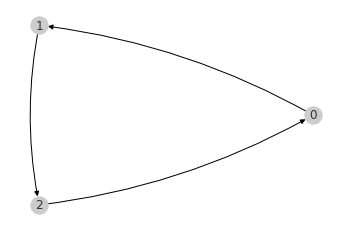

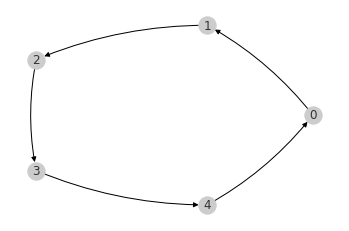

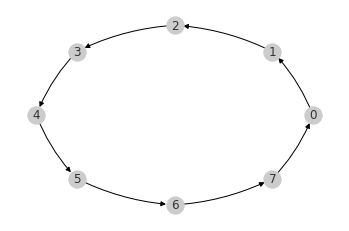

In [2]:
for plotIndex, n in enumerate((3, 5, 8)):
    plt.figure(plotIndex)
    g, layout = cyclic_graph(n)
    draw_graph(g, layout)

2. 


$\mathbb{Z}_2 \times \mathbb{Z}_2 = \left\langle x, y \ \big| \ x^2 = 1, \ y^2 = 1, \ xy = yx \right\rangle$

$\mathbb{Z}_3 \times \mathbb{Z}_2 = \left\langle x, y \ \big| \ x^3 = 1, \ y^2 = 1, \ xy = yx \right\rangle$

$\mathbb{Z}_3 \times \mathbb{Z}_3 = \left\langle x, y \ \big| \ x^3 = 1, \ y^3 = 1, \ xy = yx \right\rangle$

Noe there are two generators: $x$ (black) and $y$ (red). Nodes are labelled as $(h, k)$ but we can also think of them as $x^hy^k$.

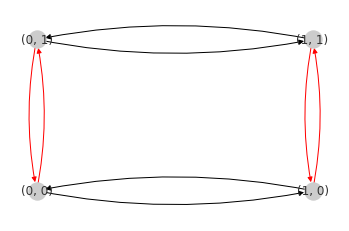

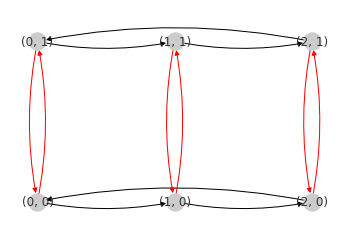

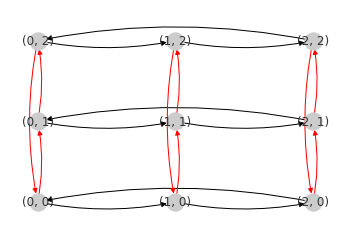

In [3]:
for plotIndex, (n, m) in enumerate(((2,2), (3,2), (3,3))):
    plt.figure(plotIndex)
    g, layout = cyclic_product_graph(n, m)
    draw_graph(g, layout)

Since the vertices of the graph and the elements of the group correspond exactly, from now on we use $g$ to mean both the group element and its corresponding vertex.

Rule 3 above can be restated: whenever $gx = h$, we draw an edge from $g$ to $h$ and label the edge with $x$. Therefore, directed paths in the graph correspond to multiplications by a sequence of generating elements. In other words, directed paths correspond to strings of generators.

A consequence of this is that each of the relations defining the presentation of the group will appear in the graph as closed loops *at every vertex of the graph*. Consider the graph of presentation $\mathbb{Z}_5 = \left\langle x \ \big| \ x^5 = 1 \right\rangle$ above. There is one relation, $x^5 = 1$. We can interpret this as both an algebraic fact and a property of the graph. The algebraic fact is that for any element $g$, we have $gx^5 = g$. Correspondingly, at any vertex $g$ in the graph, if we travel down 5 $x$-edges then we will return to the starting vertex $g$.

Now consider $\mathbb{Z}_3 \times \mathbb{Z}_2 = \left\langle x, y \ \big| \ x^3 = 1, \ y^2 = 1, \ xy = yx \right\rangle$.
The third relation, $xy = yx$, can be rewritten as $xyx^{-1}y^{-1} = 1$, using the fact that $xx^{-1} = 1$ and $yy^{-1} = 1$ :


$xy = yx$

$xy \cdot x^{-1} = yx \cdot x^{-1}$

$xyx^{-1} = y$

$xyx^{-1} \cdot y^{-1} = y \cdot y^{-1}$

$xyx^{-1}y^{-1} = 1$

Whatever relation you want to use in a presentation can always be rewritten in the form $w = 1$, where $w$ is some string of generators and their inverses, using this technique. This has the elegant interpretation of a *loop* in the graph: because we know $xyx^{-1}y^{-1} = 1$, therefore we will always come back to where we started if we make the following series of moves: 1 step forward along a black edge, 1 step forward along a red edge, 1 step *backward* along a black edge, 1 step *backward* along a red edge. These steps corespond exactly to multiplying by $x$, then $y$, then $x^{-1}$, then $y^{-1}$. This relation is visible as the square "patches" in the graph, bounded by two black edges on the top and two red edges on the sides.

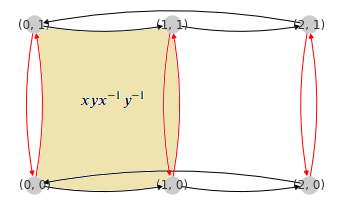

In [4]:
Image(filename='patch1.png', width=400, height=300)

To close off this section let's look at 2 more presentations and graphs for groups which we haven't yet encountered. These groups have the interesting property that the group operation is *not commutative* - that is, it's not necessarily true that $ab = ba$ for every pair of elements $a, b$ in the group. (Note that we did not require the operation to be commutative when we defined a group.) Groups that have commutative operations are called abelian, after Norwegian mathematician Niels Henrik Abel; the below groups are our first examples of non-abelian groups.

1. 


$\mathbb{D}_4 = \left\langle x, y \ \big| \ x^4 = 1, \ y^2 = 1, \ (xy)^2 = 1 \right\rangle$

$\mathbb{D}_4$ is part of a family of groups known as the dihedral groups. It contains $8$ elements, representing all the symmetries of a square. In general, $\mathbb{D}_n$ is the group of $2n$ elements representing the symmetries of the regular $n$-gon.

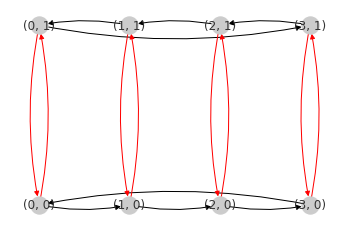

In [5]:
g, layout = dihedral_graph(4)
draw_graph(g, layout)

Compare the presentation and graph of $\mathbb{D}_4$ (above) with those of $\mathbb{Z}_4 \times \mathbb{Z}_2$ (below):

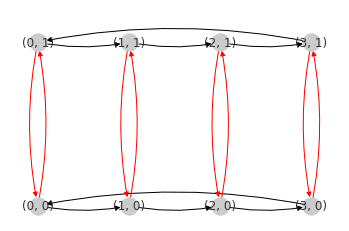

In [6]:
g, layout = cyclic_product_graph(4, 2)
draw_graph(g, layout)

$\mathbb{Z}_4 \times \mathbb{Z}_2 = \left\langle x, y \ \big| \ x^4 = 1, \ y^2 = 1, \ xy = yx \right\rangle$

In the graph for $\mathbb{Z}_4 \times \mathbb{Z}_2$ we see that the upper and lower loops formed by the black $x$-edges point in the same direction. However, in the graph for $\mathbb{D}_4$, they point in *opposite* directions. If we were to redraw the graph of $\mathbb{D}_4$ so that both upper and lower loops pointed in the same direction, we would "twist" the vertical red $y$-edges:

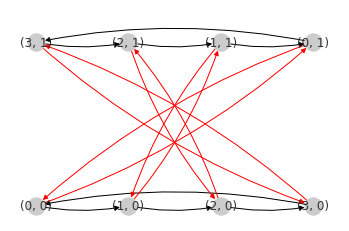

In [7]:
g, layout = dihedral_graph(4)
layout = {
    (a,b): np.array((a,b)) if b == 0 else np.array((3-a, b))
    for a,b in layout
}
draw_graph(g, layout)

In terms of presentations, the difference is in the third relation. 

$\mathbb{Z}_4 \times \mathbb{Z}_2 = \left\langle x, y \ \big| \ x^4 = 1, \ y^2 = 1, \ xy = yx \right\rangle$ 

has relation $xy = yx$ or equivalently $xyx^{-1}y^{-1} = 1$, while 

$\mathbb{D}_4 = \left\langle x, y \ \big| \ x^4 = 1, \ y^2 = 1, \ (xy)^2 = 1 \right\rangle$ 

has $(xy)^2 = 1$. We see the consequences in the graphs above. Observe that in $\mathbb{D}_4$, $xy \neq yx$. Instead we have 

$yx = yx \cdot yxy \cdot y^{-1}x^{-1}y^{-1} \ \ $   since $yxy \cdot y^{-1}x^{-1}y^{-1} = 1$

$ = y(xyxy)(y^{-1}x^{-1}y{-1}) \ \ $   grouping the products

$ = y(y^{-1}x^{-1}y{-1}) \ \ $   using $xyxy = (xy)^2 = 1$

$ = x^{-1}y^{-1}$

$ = x^3y \ \ $   since $x^4 = 1$ implies $x^3 = x^{-1}$, and $y^2 = 1$ implies $y = y^{-1}$.

This is why we draw an $x$-edge pointing from $(0, 1) = y \ $ to $(3, 1) = x^3y \ $ in the graph for $\mathbb{D}_4$. In particular, since $xy \neq yx$, the group $\mathbb{D}_4$ is not abelian.

2.


$\mathbb{Q}_8 = \left\langle -1, i, j, k \ \big| \ i^2 = j^2 = k^2 = ijk = -1, \ (-1)^2 = 1, \ \text{and -1 commutes with every element} \right\rangle$

$\mathbb{Q}_8$ is called the quaternion group. One way to write all of its elements is 

$\mathbb{Q}_8 = \left\{1, -1, i, j, k, -i, -j, -k \ \right\}$

where $-i = (-1)i \ $, $-j = (-1)j \ $, and $-k = (-1)k \ $.

Remember that the symbols given above are just labels, but they are chosen to suggest the properties of the group. Think of $i$, $j$, and $k$ like distinct square roots of $-1$ - that's why we have the relations $i^2 = j^2 = k^2 = -1$. Although there's no meaning to the label $-1$, it helps us to remember that $-1$ commutes with all the other elements of the group. Thus it is safe to write (for example): $i(-j) = (-i)j = -ij$ because all three of these refer to the same element $(-1)ij$. The last relation to consider is $ijk = -1$, which tells us how to multiply these square roots of $-1$ together.

With these relations we can derive some useful facts that will help us draw the graph.

$i(-i) = -i^2 = -(-1) = (-1)^2 = 1$

Hence $i^{-1} = -i$, and similarly for $j$ and $k$. Using this, we have:

$ijk = -1$

$ijk(-1) = (-1)^2 = 1$

$ij(-k) = 1$

$ij(-k)k = k$

$ij = k$

Similarly, we can show $jk = i$ and $ki = j$. With all these identities, it's not too difficult to build the graph below:

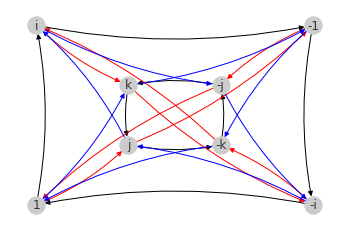

In [8]:
g, layout = quaternion_graph()
draw_graph(g, layout)

Because $ij = k$, we can actually leave out the generator $k$ from both the presentation and the graph. This will still leave us with a connected graph, since every element can be expressed using a combination of $i$'s and $j$'s:

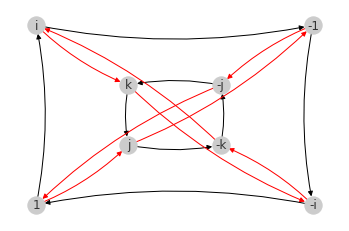

In [9]:
g, layout = quaternion_graph(dropGenerators=['k'])
draw_graph(g, layout)

However, if we drop two of the generators - say, $j$ and $k$ - then the graph becomes disconnected. There is no way to get from $1$ to $j$ using only the generator $i$, as we can see in the graph:

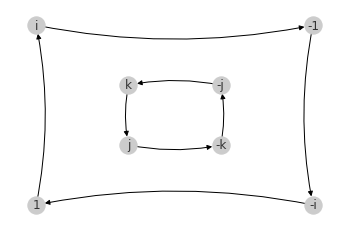

In [10]:
g, layout = quaternion_graph(dropGenerators=['j', 'k'])
draw_graph(g, layout)

### Building the graph of a group from a presentation

Starting with a presentation, there is no way, in principle, to determine what the group will look like. Generally, we have to do some work to determine how many elements the group has, or if it is even finite. Some generators may be redundant, as we saw with $\mathbb{Q}_8$. Some relations may be redundant as well - for example, in $\mathbb{Z}_4 \times \mathbb{Z}_2$ the relation $(x^2y)^2 = 1$ would be redundant, since $(x^2y)^2 = x^4y^2 = 1$ since the group is abelian and $x^4 = y^2 = 1$.

In general this is a hard problem. But we can start with a natural approach and see how far we get in constructing groups and their Cayley graphs from a presentation. Let's look at the presentation

$\mathbb{Z}_3 \times \mathbb{Z}_3 = \left\langle x, y \ \big| \ x^3 = 1, \ y^3 = 1, \ xyx^{-1}y^{-1} = 1 \right\rangle$

as an example. We already know what this group *should* look like, so it provides a good test case for our method.

We can express every element as either $1$ (the identity element) or a string of the characters $x^{a}$ and $y^{a}$, where $a$ can be any nonzero integer. For example, we have elements like $x$, $y^2$, $yxyx^{-1}$, $x^{-101}yxy^{7}x^{-1}y^{77}$, and so on. We need to determine which of these strings are equal- that is, which strings represent the same *group element*. Put another way, we want to determine a list $\{ s_1, s_2, s_3, ... \}$ of strings such that each group element is represented by exactly one string in the list.

Because each group element corresponds to a vertex of the Cayley graph, this is equivalent to constucting the Cayley graph of the group. Once we have the Cayley graph, we can produce the desired list of strings by just writing down, for each vertex $g$, a particular path in the graph from $1$ to $g$. How do we know if a graph that we've constructed is the Cayley graph? There are two criteria:

1. Let $x$ be a generator. For each vertex $g$, there is exactly one edge labelled $x$ having initial vertex $g$ and exactly one edge labelled $x$ having terminal vertex $g$.
2. Let $u_1u_2...u_n = 1$ be a relation, where each $u_i$ is either a generator or the inverse of a generator (recall that every relation can be written in this form). At every vertex $g$, the path corresponding to $u_1u_2...u_n$ is a loop (it begins and ends at $g$).

The first criterion says that the graph is *closed* under multiplication by the generators and their inverses. In other words, we're not "missing" any group elements - starting at any vertex, we can multiply by any possible string of genereators and stay within the graph, and hence within the group. The second criterion says that the graph *models* the relations. Each relation must be reflected in the graph as a closed loop at every vertex.

Thus, the goal is to produce a graph which satisfies these criteria, given an arbitrary presentation that looks like:

$\left\langle x_1, ... , x_m \ | \ w_1 = 1, ... , w_n = 1 \right\rangle$

(the $w_i$ are strings of the generators $x_i$ and their inverses $x_i^{-1}$). Here is a first stab at an algorithm that does just this:
1. Start with the identity vertex $1$, with no edges attached. Consider this an *open vertex* - it lacks its full complement of edges. If an vertex has all of its edges - one incoming edge and one outgoing edge for each generator $x_i$ - then we call it a *closed vertex*.
2. Loop over all open vertices. If the vertex is missing an $x_i$-edge, then add a new vertex and connect an $x_i$-edge from the open vertex to the new vertex. Repeat until the vertex is closed (has all its edges).
3. Prune the graph: Loop over *all* vertices. For each vertex $g$, loop over all relations $w_j$. Recall that a relation can be interpereted as a path, and we want this path to become a loop in the graph. There are three possibilities:
    1. The path starting at $g$ following relation $w_j$ can't be traversed because we don't have the edges yet. In this case we won't do anything to the graph.
    2. The path can be traversed, and it takes us back to $g$. This is what we want, so we won't do anything in this case either.
    3. The path can be traversed, and it takes us to a different vertex $h$. What this means is that these vertices represent the same group element. Hence, we should delete $h$ and connect its edges to $g$ instead. This will make the path starting at $g$ following relation $w_j$ into a loop, as desired. But, for now, we will just mark the pair $(g,h)$ as duplicates and mark $h$ for deletion.
    
After looping over all relations for all elements, we will have marked several pairs of duplicate vertices. For each pair we will delete one vertex and attach its edges to the other vertex in the pair. But now we've changed the paths in the graph - so we need to repeat the whole process, testing each relation at each vertex and deleting any duplicates we find, until we make a full pass without deleting any vertices. In addition, since we attach the edges from the deleted vertex to the preserved vertex, the preserved vertex might end up with duplicate edges for the same generator. So we need to check for that as well, and whenever we spot it we will mark the two end vertices of these duplicate edges as duplicate vertices and delete one of them.
4. Repeat steps 2-3 until all vertices are closed and all relations appear as loops at each vertex.

Clearly 3 (pruning the graph) is the most complicated step. But all we're doing is making sure each relation appears as a loop at each vertex, whenever possible. If the path corresponding to a relation starts and ends at different vertices, then we just "glue" the vertices together (we delete one, and reattach the edges of the deleted vertex to the preserved vertex). That turns the path into a loop. Then we repeat until we've made a full pass over all the vertices and all relations without gluing together any vertices.

There are two possibilities after finishing step 3. Either there are still open nodes, in which case we go back to step 2, or not - in which case we've constructed a graph where each relation appears as a loop at each vertex, and each vertex has its full complement of edges. These are the criteria given above for a Cayley graph, so we know that we've constructed the Cayley graph of the given presentation.

In [902]:
from group_graphs import *

class Node:
    """ A node (vertex/element) in a Cayley graph """

    graph = None

    def __init__(self, word):
        if not self.graph:
            raise NotImplementedError('Set Node.graph to a CayleyGraph object before creating a Node object')
        # Note: dict lists will just be lists of nodes
        self.inEdges =  {x: [] for x in self.graph.generators}
        self.outEdges = {x: [] for x in self.graph.generators}
        self.word = word
        
    def __repr__(self):
        return f'<Node: { str(self.word) }>'
    
    def __lt__(self, other):
        return self.word < other.word
    
    @property
    def isOpen(self):
        return all([self.inEdges[g] and self.outEdges[g] for g in graph.generators])
    
    def add_edge_to(self, to, generator):
        if to not in self.outEdges[generator]:
            self.outEdges[generator].append(to)
        
    def add_edge_from(self, from_, generator):
        if from_ not in self.inEdges[generator]:
            self.inEdges[generator].append(from_)
        
    def delete_edge_to(self, to, generator):
        self.outEdges[generator].remove(to)
        
    def delete_edge_from(self, from_, generator):
        self.inEdges[generator].remove(from_)
        
    def edges(self):
        """ Return list of (node, generator, sign)
            sign=1 if edge points from self to node
            sign=-1 if edge points from node to self
        """
        
        return [
            (node, g, sign)
            for g in self.graph.generators
            for sign, adjNodes in ((1, self.outEdges[g]), (-1, self.inEdges[g]))
            for node in adjNodes
        ]
    
    def adjacent_nodes(self):
        return [edge[0] for edge in self.edges()]
        
    def copy_edges_to(self, other):
        """ Copy all edges from self to other """
        
        for g in self.graph.generators:
            other.outEdges[g] += self.outEdges[g]
            for node in self.outEdges[g]:
                node.inEdges[g].append(other)
            other.inEdges[g] += self.inEdges[g] 
            for node in self.inEdges[g]:
                node.outEdges[g].append(other)
            
    def detach(self):
        """ Remove all edges from other nodes that connect other to self """
        
        for g in self.graph.generators:
            for other in self.outEdges[g]:
                try:
                    other.inEdges[g].remove(self)
                except ValueError:
                    print(f'Warning: edge not found'
                          f'({ self }, { other }, { g })')
            for other in self.inEdges[g]:
                try:
                    other.outEdges[g].remove(self)
                except ValueError:
                    print(f'Warning: edge not found'
                          f'({ other }, { self }, { g })')
        
    def step(self, generator, sign):
        """ Step along a single generator-edge and return destination node 
            If sign=1, move along an out-edge; if sign=-1, an in-edge
            If no edge to move along, return None
        """
        
        if sign == 1 and self.outEdges[generator]:
            return self.outEdges[generator][0]
        if sign == -1 and self.inEdges[generator]:
            return self.inEdges[generator][0]
        return None

    
class CayleyGraph:
    """ Cayley graph of a presentation """
    
    def __init__(self, generators, relations):
        """ 
        Arguments:
        generators -- an iterable of names for the generators, e.g. 'xyz' or ['x', 'y', 'z']
        relations  -- Let (x, n) represent x^n, where x is a generator and n an integer.
                      Then a relation can be represented as an iterable ((x_1, n_1), ... , (x_r, n_r)).
                      This corresponds to the algebraic equation (in LaTex syntax) $x_1^{n_1}...x_r{n_r} = 1$.
                      The "relations" should be an iterable of relations represented in this way.
                      
        Example:
        The presentation $D_3 = \langle x, y | x^3 = y^2 = (xy)^2 = 1 \rangle$ would be represented as follows:
        generators = 'xy' or ['x', 'y']
        relations = [ 
            [('x', 3)], 
            [('y', 2)], 
            [('x', 1), ('y', 1), ('x', 1), ('y', 1)],
        ]
        """
        
        self.generators = tuple(generators)
        self.relations = [Word.fromList(r) for r in relations]
        self.flattenedRelations = [r.flattened() for r in self.relations]
        Node.graph = self
        # empty word == identity element
        identity = Word()
        self.elements = {str(identity): Node(identity)}
        
    def _add_edge(self, fromNode, toNode, g):
        """ Update (add) both nodes' edge lists for generator g """
        
        fromNode.add_edge_to(toNode, g)
        toNode.add_edge_from(fromNode, g)
        
    def _delete_edge(self, fromNode, toNode, g):
        """ Update (del) both nodes' edge lists for generator g """
        
        fromNode.delete_edge_to(toNode, g)
        toNode.delete_edge_from(fromNode, g)
        
    def _fill_node(self, node):
        """ Add edges to node so it has one+ of each generator/direction """
        
        word = node.word
        for g in self.generators:
            if not node.outEdges[g]:
                newNode = Node(word.copy_extend_right(g, 1))
                self.elements[str(newNode.word)] = newNode
                self._add_edge(node, newNode, g)
            if not node.inEdges[g]:
                newNode = Node(word.copy_extend_right(g, -1))
                self.elements[str(newNode.word)] = newNode
                self._add_edge(newNode, node, g)
        
    def extend_nodes(self):
        """ Fill edges of all open nodes; return True iff nodes added """
        
        prev = len(self.elements)
        for node in self.elements.copy().values():
            self._fill_node(node)
        return len(self.elements) > prev
            
    def _path_end_node(self, start, flattenedWord):
        """ Follow path word from start to end; return end node
            If can't complete path, return None
        """
        
        node = start
        for g, sign in flattenedWord:
            node = node.step(g, sign)
            if not node:
                break
        return node
            
    def _identify_pairs(self):
        """ Return list of pairs of nodes to be glued together """
               
        return [
            pair for pair in 
            [
                (start, self._path_end_node(start, path))
                for start in self.elements.values()
                for path in self.flattenedRelations
            ]
            if pair[1] and pair[1] != pair[0]
        ]
    
    def _glue_nodes(self, keep, drop):
        """ Delete node 'drop' after moving its edges to node 'keep' """
        
        for node, g, sign in drop.edges():
            if sign == 1:
                self._add_edge(keep, node, g)
                self._delete_edge(drop, node, g)
            else:
                self._add_edge(node, keep, g)
                self._delete_edge(node, drop, g)
        del self.elements[str(drop.word)]
        
    def prune_nodes(self):
        """ Identify equivalent nodes and glue them together 
            Return True iff at least one pair was glued
        """
        
        glued = False
        for pair in self._identify_pairs():
            if all((str(node.word) in self.elements for node in pair)):
                self._glue_nodes(keep=min(pair), drop=max(pair))
                glued = True
        return glued
            
    def edges(self):
        """ Return list of edges in the form (node_1, node_2, generator) """
        
        return [
            (node_1, node_2, g)
            for node_1 in self.elements.values()
            for g in self.generators
            for node_2 in node_1.outEdges[g]
        ]
    
    def _elements_by_length(self):
        """ Return dict {length: [nodes]} """
        
        elementsByLength = {}
        for node in self.elements.values():
            length = len(node.word)
            if length in elementsByLength:
                elementsByLength[length].append(node)
            else:
                elementsByLength[length] = [node]
        return elementsByLength
    
    def _radial_layout(self, sortLevels):
        """ Return a NetworkX layout of graph in concentric rings, with radius
            given by word length and dictionary ordering within rings
        """
        
        if len(self.elements) == 1:
            return {str(Word()): [0,0]}
        elementsByLength = self._elements_by_length()
        layout = {}
        for length in sorted(elementsByLength.keys()):
            nodes = elementsByLength[length]
            count = float(len(nodes))
            nodeIter = sorted(nodes) if sortLevels else nodes
            disp = math.pi/4 if length % 2 == 1 else 0
            for i, u in enumerate(nodeIter):
                layout[str(u.word)] = [
                    length * math.cos( 2*math.pi*i/count + disp ), 
                    length * math.sin( 2*math.pi*i/count + disp ),
                ]
        return layout
    
    def _tree_layout(self, sortLevels):
        """ Return a NetworkX layout of graph as a tree, with depth
            given by word length and dictionary ordering within levels
        """
        
        if len(self.elements) == 1:
            return {str(Word()): [0,0]}
        elementsByLength = self._elements_by_length()
        maxLength = max(elementsByLength.keys())
        layout = {}
        for length in sorted(elementsByLength.keys()):
            nodes = elementsByLength[length]
            count = float(len(nodes))
            nodeIter = sorted(nodes) if sortLevels else nodes
            for i, u in enumerate(nodeIter):
                layout[str(u.word)] = [(i+1)/(count+1), maxLength-length]
        return layout
            
    def nx_graph(self, layout='tree', sortLevels=True):
        """ Convert into a NetworkX graph (return nx graph, layout) """
        
        g = nx.DiGraph()
        edges = self.edges()
        weightMap = {g: i for i, g in enumerate(self.generators)}
        g.add_weighted_edges_from(
            [(str(u.word), str(v.word), weightMap[g]) for u, v, g in edges]
        )
        if not g.nodes:
            g.add_node(str(Word()))
        if layout == 'tree':
            layout = self._tree_layout(sortLevels)
        elif layout == 'radial':
            layout = self._radial_layout(sortLevels)
        return g, layout

In [879]:
def draw_cg(cg, layoutStyle='tree', layout=None, withLabels=True, sortLevels=False):
    """ Draw a CayleyGraph using draw_graph defined above """
    
    if layoutStyle == 'tree':
        g, layout = cg.nx_graph(layout='tree', sortLevels=sortLevels)
    elif layoutStyle == 'radial':
        g, layout = cg.nx_graph(layout='radial', sortLevels=sortLevels)
    elif layoutStyle == 'custom':
        if not layout:
            raise ValueError('If layoutStyle=="custom", must provide a layout')
        g, _ = cg.nx_graph(sortLevels=sortLevels)
    else:
        raise ValueError(f'Unexpected layoutStyle "{ layoutStyle }"')
    draw_graph(g, layout, withLabels=withLabels)

Let's start with the Cayley graph for 

$\mathbb{Z}_2 \times \mathbb{Z}_2 = \left\langle x, y \ \big| \ x^2 = 1, \ y^2 = 1, \ xyx^{-1}y^{-1} = 1 \right\rangle$

since the result should be a small graph (4 elements) and we can easily see if it's correct by inspection.

First, let's see what happens if we simply repeat step 2 (expanding the graph at open nodes) without step 3 (pruning the graph using the relations):

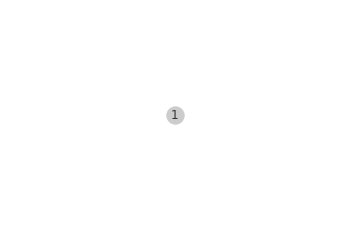

In [847]:
cg = CayleyGraph(
    generators = 'xy', 
    relations = [
        [('x', 2)], 
        [('y', 2)], 
        [('x', 1), ('y', 1), ('x', -1), ('y', -1)]
    ],
)
draw_cg(cg)

Af first, we just have a single node for the identity element $1$. As an aside, the identity element by itself is actually a group called the *trivial group*.

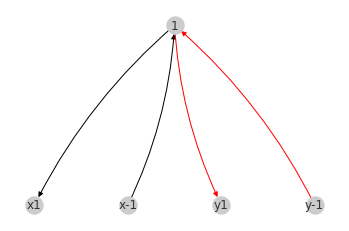

In [469]:
cg.extend_nodes()
draw_cg(cg)

After one extension, we now have all the words of length 1 or less: $1$, $x$, $x^{-1}$, $y$, and $y^{-1}$.

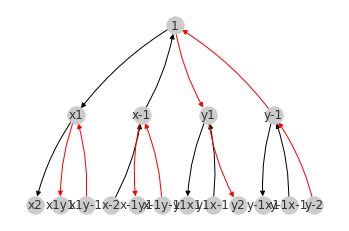

In [470]:
cg.extend_nodes()
draw_cg(cg)

After two extensions, we have all the words of length at most two. It's hard to see in the plot but we can list them explicitly:

In [447]:
for word in cg.elements:
    print(word)

1
x1
x-1
y1
y-1
x2
x1y1
x1y-1
x-2
x-1y1
x-1y-1
y1x1
y1x-1
y2
y-1x1
y-1x-1
y-2


Visually, the behavior is clear: every time we extend (without pruning), we increase the size of the graph exponentially. This is because all the nodes added in the previous extension are open, and each extension (after the first) will add 3 new nodes for each open node.

In fact, what we do by extending the graph without pruning is construct, level by level, the Cayley graph of the *free group on 2 generators*. This is an infinite group with 2 generators and no relations; that is, its presentation is:

$F_2 = \left\langle x, y \ \big| \right\rangle$

Since it has no relations, its Cayley graph has no loops; the graph is an infinite tree.

Now, returning to

$\mathbb{Z}_2 \times \mathbb{Z}_2 = \left\langle x, y \ \big| \ x^2 = 1, \ y^2 = 1, \ xyx^{-1}y^{-1} = 1 \right\rangle$

let's add the pruning step after each extension step. After the first extension we have:

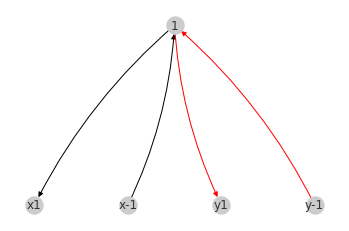

In [848]:
cg = CayleyGraph(
    generators = 'xy', 
    relations = [
        [('x', 2)], 
        [('y', 2)], 
        [('x', 1), ('y', 1), ('x', -1), ('y', -1)]
    ],
)
cg.extend_nodes()
draw_cg(cg)

Because of the relation $x^2 = 1$, walking the path: $x^{-1} \xrightarrow{x} 1 \xrightarrow{x} x$ should take us back to where we started - that is, $x^{-1}$ and $x$ should be the same element. Similarly, because of the relation $y^2 = 1$ we should have $y^{-1} = y$. We expect the pruning step to glue these elements together, resulting in just the elements $1$, $x^{-1}$, and $y^{-1}$:

Were any nodes removed? Yes


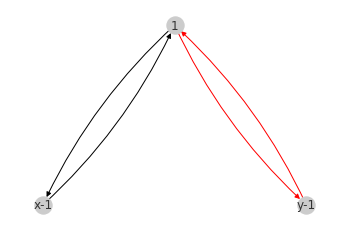

In [477]:
didRemoveNodes = cg.prune_nodes()
print('Were any nodes removed?', 'Yes' if didRemoveNodes else 'No')
draw_cg(cg)

As we predicted, the nodes were glued together to form loops in the graph. But there are still open nodes - $x^{-1}$ is missing its $y$-edges and $y^{-1}$ is missing its $x$-edges. So we need another round of extension:

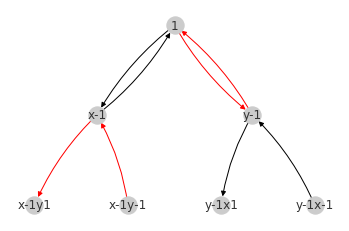

In [479]:
cg.extend_nodes()
draw_cg(cg)

Here, the relations $x^2 = y^2 = 1$ will again cause us to glue the bottom two nodes together on each branch. But remember, we have one more relation $xyx^{-1}y^{-1} = 1$. If we start at node $y^{-1}x^{-1}$ and walk the path $xyx^{-1}y^{-1} = 1$, we end up at $x^{-1}y^{-1}$. So, we should expect these nodes to also be glued together in the next pruning step:

Were any nodes removed? Yes


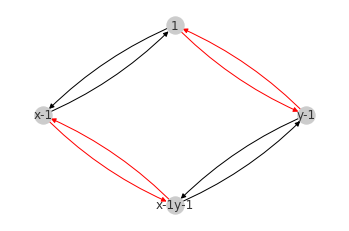

In [480]:
didRemoveNodes = cg.prune_nodes()
print('Were any nodes removed?', 'Yes' if didRemoveNodes else 'No')
draw_cg(cg)

The graph is closed! We glued $x^{-1}y^{-1}$ to $x^{-1}y$ because of relation $x^2=1$. We glued $y^{-1}x$ to $y^{-1}x^{-1}$ because of relation $y^2 = 1$. Finally we glued $y^{-1}x^{-1}$ to $x^{-1}y^{-1}$ because of relation $xyx^{-1}y^{-1} = 1$. In total, all 4 of the lowest nodes were glued together into a single node $x^{-1}y^{-1}$.

We can see that the resulting graph is closed, and we can verify that it matches the graph above for $\mathbb{Z}_2 \times \mathbb{Z}_2$ (the vertex labels are different but there are many possible choices of labels for the same elements of the same group). 

If we try to prune the nodes, nothing will happen because every relation already appears as a loop at every vertex:

Were any nodes removed? No


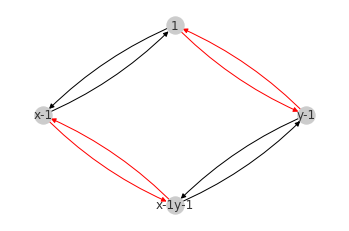

In [481]:
didRemoveNodes = cg.prune_nodes()
print('Were any nodes removed?', 'Yes' if didRemoveNodes else 'No')
draw_cg(cg)

If we try to extend the nodes, nothing will happen because all nodes have the full set of edges already:

Were any nodes added? No


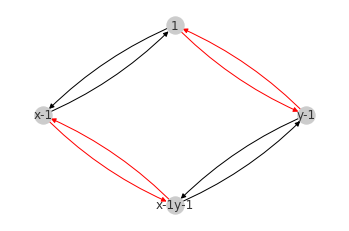

In [482]:
didAddNodes = cg.extend_nodes()
print('Were any nodes added?', 'Yes' if didAddNodes else 'No')
draw_cg(cg)

This means our algorithm above stops - it can no longer prune or extend nodes. The Cayley graph building process was successful.

Now let's try it with a larger graph and see how it works.

$\mathbb{Z}_3 \times \mathbb{Z}_3 = \left\langle x, y \ \big| \ x^3 = 1, \ y^3 = 1, \ xyx^{-1}y^{-1} = 1 \right\rangle$

This should give us a graph of 9 elements arranged in a kind of grid shape.

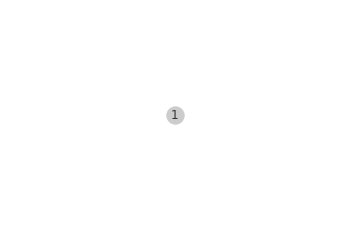

In [523]:
cg = CayleyGraph(
    generators = 'xy', 
    relations = [
        [('x', 3)], 
        [('y', 3)], 
        [('x', 1), ('y', 1), ('x', -1), ('y', -1)]
    ],
)
draw_cg(cg)

Here's what happens if we run a few extension/pruning steps:

Pruning round
Pruning round
Pruning round
Pruning round
Pruning round


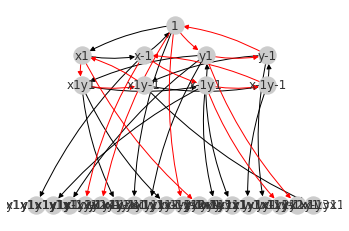

In [529]:
cg.extend_nodes()
while cg.prune_nodes(): print('Pruning round')
draw_cg(cg)

Uh-oh. Something has gone horribly wrong. But notice that there are 9 elements at the top, which appear to be connected in close to the correct way - it's just that the 9 correct elements seem to be attached to a growing mass of junk at the bottom. Let's restart and look at each step one-by-one to see if we can spot the problem.

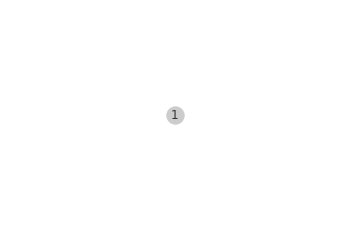

In [578]:
cg = CayleyGraph(
    generators = 'xy', 
    relations = [
        [('x', 3)], 
        [('y', 3)], 
        [('x', 1), ('y', 1), ('x', -1), ('y', -1)]
    ],
)
draw_cg(cg)

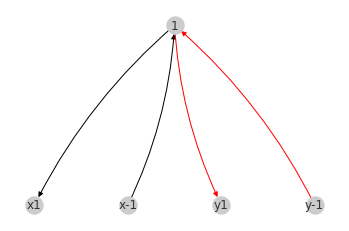

In [579]:
cg.extend_nodes()
while cg.prune_nodes(): print('Pruning round')
draw_cg(cg)

Pruning round


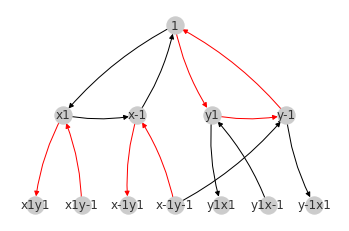

In [580]:
cg.extend_nodes()
while cg.prune_nodes(): print('Pruning round')
draw_cg(cg)

Pruning round
Pruning round
Pruning round
Pruning round


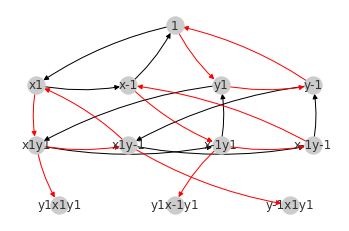

In [581]:
cg.extend_nodes()
while cg.prune_nodes(): print('Pruning round')
draw_cg(cg)

Look carefully at this graph. We can see the 9 desired elements in the first 3 layers. But then there are 3 extra elements at the bottom that weren't removed in the pruning steps. Why?

The problem is that some of the correct nodes that we want to keep have duplicate edges! For example, $xy$ has a $y$-edge pointing to $yxy$ and another $y$-edge pointing to $xy^{-1}$. This means, as group elements, $yxy = xy^{-1}$ so they should be glued together. But we never told the graph to do this kind of gluing - we only told it glue the relations we passed in (which were $x^3$, $y^3$, and $xyx^{-1}y^{-1}$.

In other words, our graph is ignoring the "trivial" relations $xx^{-1} = x^{-1}x = yy^{-1} = y^{-1}y = 1$, which are part of the definition of a group, but were not programmed into the pruning step.

Let's alter the algorithm to handle this case and see if it fixes the problem.

In [903]:

def duplicate_edge_pairs(self):
    """ Return list of pairs (keep, drop) of nodes connected by duplicate edges """
    
    def dup_pairs(sortedEdges):
        return [(sortedEdges[0], x) for x in sortedEdges[1:]]
        
    return [
        x 
        for g in self.graph.generators
        for edges in (self.inEdges[g], self.outEdges[g])
        for x in dup_pairs(sorted(edges))
        if x
    ]

Node.duplicate_edge_pairs = duplicate_edge_pairs

def _identify_pairs_v2(self):
    """ Return list of pairs of nodes to be glued together 

        v2 -- Use duplicate edges to identify more pairs to glue
    """

    return ( 
        [
            pair for pair in 
            [
                (start, self._path_end_node(start, path))
                for start in self.elements.values()
                for path in self.flattenedRelations
            ]
            if pair[1] and pair[1] != pair[0]
        ]
        + [
            x 
            for node in self.elements.values()
            for x in node.duplicate_edge_pairs()
            if x
        ]
    )

CayleyGraph._identify_pairs = _identify_pairs_v2

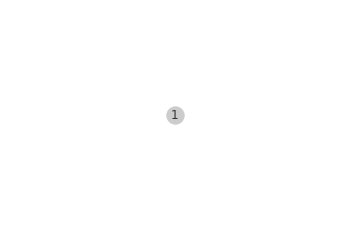

In [874]:
cg = CayleyGraph(
    generators = 'xy', 
    relations = [
        [('x', 3)], 
        [('y', 3)], 
        [('x', 1), ('y', 1), ('x', -1), ('y', -1)]
    ],
)
draw_cg(cg)

Now let's repeat the 3 extension/pruning steps above and see what we get:

---
Step 0
---
Step 1
Pruning round
---
Step 2
Pruning round
Pruning round
Pruning round
Pruning round


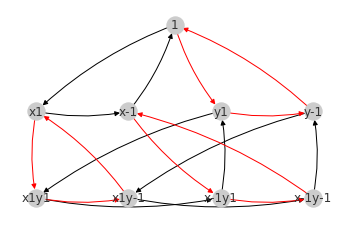

In [875]:
for i in range(3):
    print('---')
    print('Step', i)
    cg.extend_nodes()
    while cg.prune_nodes(): print('Pruning round')
draw_cg(cg)

It worked! We have a closed graph of 9 elements, as expected. Let's verify that pruning/extending doesn't change the graph anymore:

Any nodes added? No
Any nodes removed? No


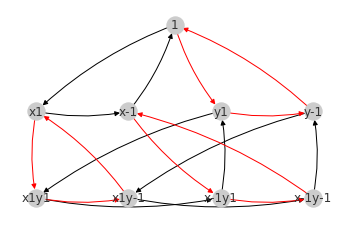

In [884]:
print('Any nodes added?', 'Yes' if cg.extend_nodes() else 'No')
print('Any nodes removed?', 'Yes' if cg.prune_nodes() else 'No')
draw_cg(cg, layoutStyle='tree', sortLevels=False)

Note: the graph looks pretty different than the one given before for the same group, which looked like this:

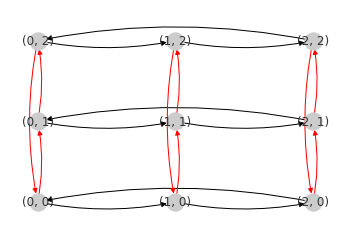

In [589]:
g, layout = cyclic_product_graph(3, 3)
draw_graph(g, layout)

But, if we simply use a custom layout to draw it as a grid, we see that the two graphs are, in fact, identical:

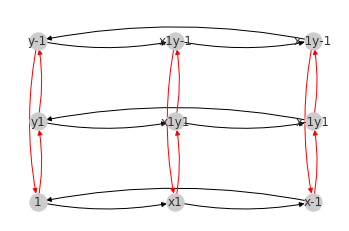

In [605]:
def word_to_pos(w):
    if w == '1':
        return [0, 0]
    exps = [int(e) for e in re.split('x|y', w) if e]
    if len(exps) == 1:
        if 'x' in w:
            return [exps[0] % 3, 0]
        return [0, exps[0] % 3]
    return [e % 3 for e in exps]

g, layout = cg.nx_graph()
layout = {word: word_to_pos(word) for word in layout}
draw_graph(g, layout)

Finally let's build the graphs of a few more presentations to make sure everything is working as expected.

1. 


$\mathbb{Q}_8 = \left\langle -1, i, j, k \ \big| \ i^2 = j^2 = k^2 = ijk = -1, \ (-1)^2 = 1, \ \text{and -1 commutes with every element} \right\rangle$

To input this we need to rewrite the relations in the form $w = 1$. We can also simplify the presentation a bit. First, we can remove $-1$. This leaves us with the relations:

$i^2 = j^2 = k^2 = ijk, \ (i^2)^2 = 1, \ i^2 \text{ commutes with every element}$

We can rewrite these as:

$i^2 = j^2 \ \ \Longrightarrow \ \ i^2j^{-2} = 1$ , 

$j^2 = k^2 \ \ \Longrightarrow \ \ j^2k^{-2} = 1$ , 

$k^2 = ijk \ \ \Longrightarrow \ \ ijk^{-1} = 1$ , 

$(i^2)^2 = 1 \ \ \Longrightarrow \ \ i^4 = 1$

To express that $i^2$ commutes with every element, it's enough to write that $i^2$ commutes with the generators $i, j, k$. It's always true that $i^2$ commutes with $i$, so we only need to add the two relations for $j$ and $k$:

$i^2j = ji^2 \ \ \Longrightarrow \ \ i^2ji^{-2}j^{-1} = 1$

$i^2k = ki^2 \ \ \Longrightarrow \ \ i^2ki^{-2}k^{-1} = 1$

So at last, the presentation we'll input to the algorithm is:

$\mathbb{Q}_8 = \left\langle i, j, k \ \big| \ i^2j^{-2} = j^2k^{-2} = ijk^{-1} = i^4 = i^2ji^{-2}j^{-1} = i^2ki^{-2}k^{-1} = 1 \right\rangle$

In [654]:
cg = CayleyGraph(
    generators = 'ijk', 
    relations = [
        [('i', 2), ('j', -2)], 
        [('j', 2), ('k', -2)], 
        [('i', 1), ('j', 1), ('k', -1)],
        [('i', 4)],
        [('i', 2), ('j', 1), ('i', -2), ('j', -1)],
        [('i', 2), ('k', 1), ('i', -2), ('k', -1)],
    ],
)

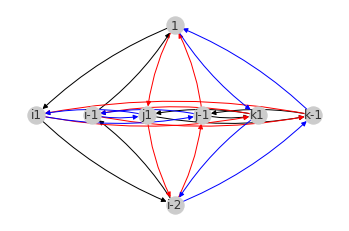

In [655]:
while cg.extend_nodes():
    while cg.prune_nodes(): pass
draw_cg(cg)

To confirm that this is the graph we were expecting, let's use a custom layout to check against the graph we had before:

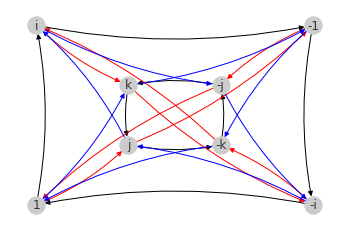

In [676]:
g, layout = quaternion_graph()
draw_graph(g, layout)

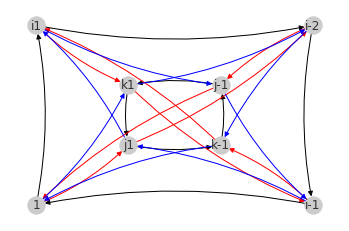

In [678]:
def word_to_pos(w):
    if w == '1': return [0, 0]
    exp = int(re.split('i|j|k', w)[-1])
    if 'i' in w:
        if exp == 1:  return [0, 3]
        if exp == -2: return [3, 3]
        if exp == -1: return [3, 0]
    if w == 'j1':   return [1, 1]
    if w == 'k1':   return [1, 2]
    if w == 'j-1':  return [2, 2]
    if w == 'k-1':  return [2, 1]
    print(w, exp)
    return [0, 0]

g, layout = cg.nx_graph()
layout = {word: word_to_pos(word) for word in layout}
draw_graph(g, layout)

2. 


$D_8 = \left\langle x, y \ \big| \ x^8 = 1, \ y^2 = 1, \ (xy)^2 = 1 \right\rangle$

We've already seen the dihedral groups so we know what the graph should look like, but to test our algorithm a little let's add a superfluous third generator $z = yx^3y$. Then our presentation becomes:

$D_8 = \left\langle x, y, z \ \big| \ x^8 = 1, \ y^2 = 1, \ (xy)^2 = 1, \ yx^3yz^{-1} = 1 \right\rangle$

In [850]:
cg = CayleyGraph(
    generators = 'xyz', 
    relations = [
        [('x', 8)], 
        [('y', 2)], 
        [('x', 1), ('y', 1), ('x', 1), ('y', 1)],
        [('y', 1), ('x', 3), ('y', 1), ('z', -1)],
    ],
)

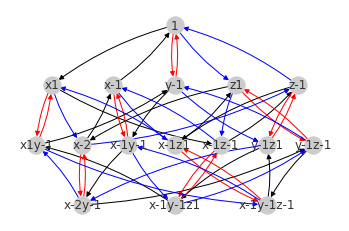

In [851]:
while cg.extend_nodes():
    while cg.prune_nodes(): pass
draw_cg(cg)

For reference, here's the drawing of $D_8$ we get by the original method:

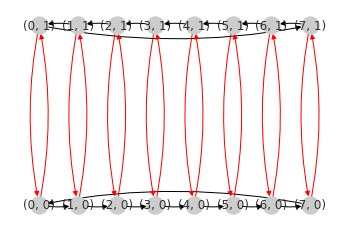

In [683]:
g, layout = dihedral_graph(8)
draw_graph(g, layout)

If we redraw the graph we just constructed from the presentation, we get the same picture:

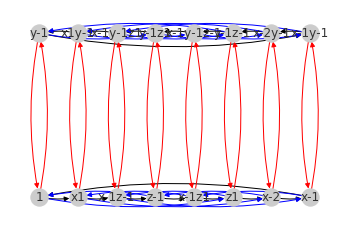

In [715]:
x_cycles = {}
for start in ('1', 'y-1'):
    cycle = [start]
    while True:
        s = str(cg.elements[cycle[-1]].outEdges['x'][0].word)
        if s == start:
            break
        else:
            cycle.append(s)
    x_cycles[start] = cycle
    
def word_to_pos(w):
    for i, c in enumerate(x_cycles['1']):
        if w == c: return [i, 0]
    for i, c in enumerate(x_cycles['y-1']):
        if w == c: return [(-i) % 8, 1]

g, layout = cg.nx_graph()
layout = {word: word_to_pos(word) for word in layout}
draw_graph(g, layout)

The $z$-edges make it hard to see, but indeed the top and bottom $x$-edges point in opposite directions, as expected.

3. 

Finally let's look at a particularly aesthetic graph:

$G = \left\langle x, y, z \ \big| \ x^4 = 1, \ y^3 = 1, \ z^2 = 1, \ yxz = 1 \right\rangle$

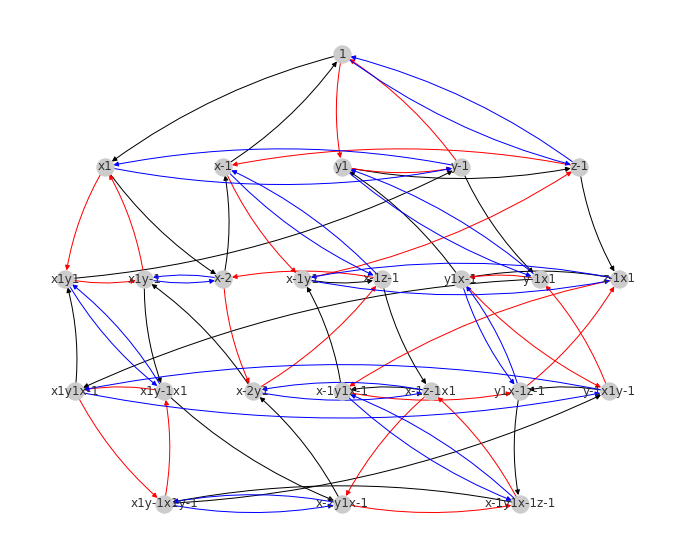

In [977]:
cg = CayleyGraph(
    generators = 'xyz', 
    relations = [
        [('x', 4)], 
        [('y', 3)],
        [('z', 2)],
        [('y', 1), ('x', 1), ('z', 1)],
    ],
)

while cg.extend_nodes():
    while cg.prune_nodes(): pass
plt.figure(figsize=(12,10))
draw_cg(cg)

Admittedly the drawing above is not that illuminating, but by redrawing we can see it's a planar graph:

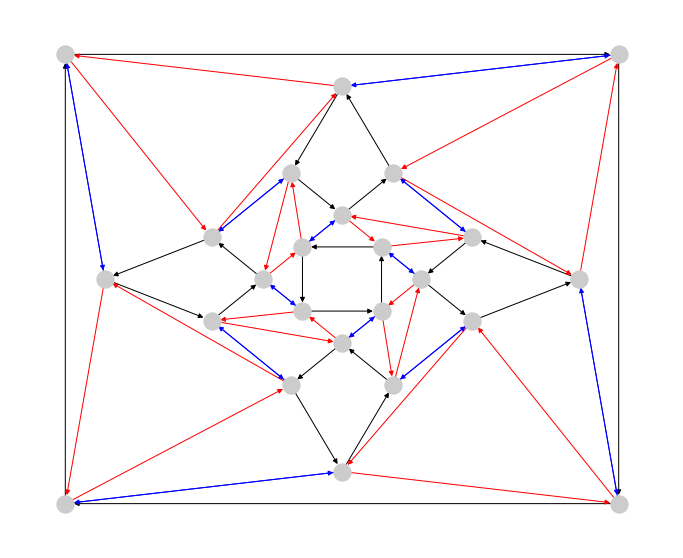

In [826]:
x_cycles = {}
for start in ('1', 'y-1', 'z-1', 'x-1z-1', 'x1y-1', 'y-1x1y-1'):
    cycle = [start]
    while True:
        s = str(cg.elements[cycle[-1]].outEdges['x'][0].word)
        if s == start:
            break
        else:
            cycle.append(s)
    x_cycles[start] = cycle
    
cycleBLC = {'1': [0,0], 'y-1': [1,3], 'z-1': [3,1],
            'x-1z-1': [5,3], 'x1y-1': [3,5], 'y-1x1y-1': [3,3]}

def rotate(point, blc, L=1):
    u, v = point
    u0, v0 = blc
    d = 2.0
    if point == [u0    , v0    ]: return [u - L/d, v + L/d]
    if point == [u0 + L, v0    ]: return [u - L/d, v - L/d]
    if point == [u0 + L, v0 + L]: return [u + L/d, v - L/d]
    if point == [u0    , v0 + L]: return [u + L/d, v + L/d]
    
def bump_in(point, b):
    u,v = point
    if u < 3.5: u += b
    else: u -= b
    if v < 3.5: v += b
    else: v -= b
    return [u,v]
    
def word_to_pos(w):
    for seed, cycle in x_cycles.items():
        a, b = cycleBLC[seed]
        for i, c in enumerate(cycle):
            if w == c:
                size = 7 if seed == '1' else 1
                if seed == 'z-1':
                    i = (i + 1)%4
                if seed == 'x1y-1':
                    i = (i - 1)%4
                if seed == 'x-1z-1':
                    i = (i + 2)%4
                if seed == '1':
                    x = a + size if i in (2, 3) else a
                    y = b + size if i in (1, 2) else b
                else:
                    x = a + size if i in (1, 2) else a
                    y = b + size if i in (2, 3) else b
                if seed not in ('1', 'y-1x1y-1'):
                    [x, y] = rotate(point=[x,y], blc=[a,b])
                if w in ('y1', 'y-1x1', 'x1y1', 'x1y-1x1', 'x-2y1', 'x-1z-1x1', 'x-1y1', 'z-1x1'):
                    [x, y] = bump_in([x, y], 0.35)
                return [x, y]

g, layout = cg.nx_graph()
layout = {word: word_to_pos(word) for word in layout}
plt.figure(figsize=(12,10))
draw_graph(g, layout, connectionstyle='arc3, rad=0', withLabels=False)

### Problem-solving: Burnside groups

The *Burnside groups* are a family of groups related to the *Burnside problem*. William Burnside posed the following question in the early 20th century: if we know a group has finitely many generators, and we know that every group element, when raised to some finite power (which may depend on that element), is the identity; then, is the group necessarily finite?

It's important that in the original statement, the power may depend on the element - so, for example, you may have a series of elements $a_1, a_2, ...$ where $a_1^{n_1} = 1$, $a_2^{n_2} = 1$ and so on, but the sequence of powers $n_1, n_2, ...$ is *increasing to infinity*.

This problem was eventually answered in the negative - there *are* infinite groups which are finitely generated where every element is 1 when raised to some finite power. But it gave rise to a *second* question, which is more restricted: suppose we know a group is finitely generated, and there is a number $n$ such that $g^n = 1$ for every group element $g$; then is the group finite? Note that now the exponent $n$ does *not* vary with the group element $g$ - it is the same over the entire group.

Therefore, we can rephrase the problem as follows: let $B(m, n)$ be the group defined by the presentation:

$B(m, n) = \left\langle x_1, ... , x_m \ \big| \ g^n = 1 \ \text{for all elements g} \right\rangle$

We call this the *Burnside group on m generators with exponent n*. Is $B(m,n)$ finite?

It was discovered that when $n$ is sufficiently large, there *are* infinite finitely generated groups with exponent $n$. Hence, the problem is to determine for *what* values of $m$, $n$ are the groups finite or infinite. With a little work we can show that $B(m, 2)$ is isomorphic to $\mathbb{Z}_2 \times ... \times \mathbb{Z}_2$ (with $m$ products) and that $B(1, n)$ is isomorphic to $\mathbb{Z}_n$. So things only get interesting when $m$ is at least $2$ and $n$ is at least $3$.

Let's use our Cayley graph algorithm to prove that 

$B(2, 3) = \left\langle x, y \ \big| \ g^3 = 1 \ \text{for all elements g} \right\rangle$

is a finite group. All we need to do is keep adding relations and trying to build to graph, until we've added enough relations to make the group finite. (We could just add a bunch of relations at once and build the finished graph immediately, but it's interesting to see what happens if we add them one-by-one.)

First we add in just the relations $x^3 = y^3 = 1$:

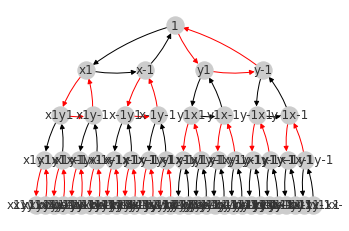

In [723]:
cg = CayleyGraph(
    generators = 'xy', 
    relations = [
        [('x', 3)], 
        [('y', 3)], 
#         [('x', 1), ('y', 1)]  * 3,
#         [('x', 1), ('y', -1)] * 3,
    ],
)

while cg.extend_nodes():
    while cg.prune_nodes(): pass
    if len(cg.elements) > 50: break
draw_cg(cg)

With just $x^3 = y^3 = 1$ we're essentially getting an infinite binary tree, plus some extra edges on each level closing the $x$-cycles and $y$-cycles. We can see that this will never stop and these relations aren't enough to make the group finite.

Now let's add in $(xy)^3 = 1$:

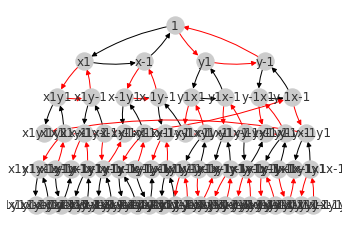

In [728]:
cg = CayleyGraph(
    generators = 'xy', 
    relations = [
        [('x', 3)], 
        [('y', 3)], 
        [('x', 1), ('y', 1)]  * 3,
#         [('x', 1), ('y', -1)] * 3,
    ],
)

while cg.extend_nodes():
    while cg.prune_nodes(): pass
    if len(cg.elements) > 50: break
draw_cg(cg)

The structure is a bit more complex; the branches are more interwoven; but, it still looks like this is growing without bound.

Finally, add $(xy^{-1})^3 = 1$:

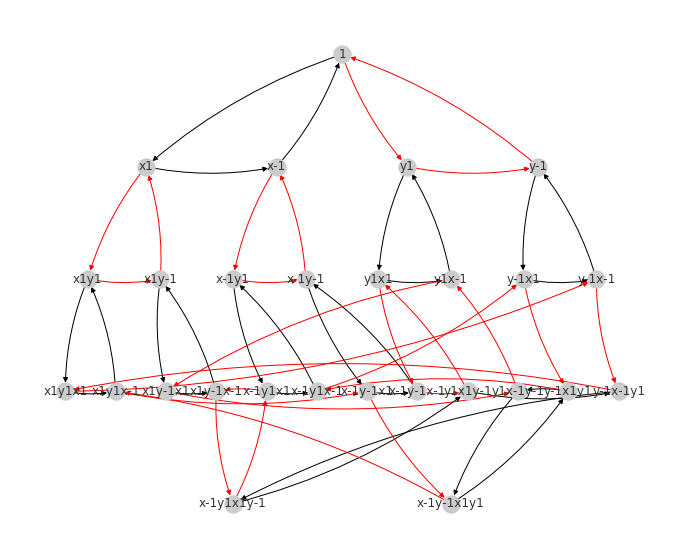

In [976]:
cg = CayleyGraph(
    generators = 'xy', 
    relations = [
        [('x', 3)], 
        [('y', 3)], 
        [('x', 1), ('y', 1)]  * 3,
        [('x', 1), ('y', -1)] * 3,
    ],
)

while cg.extend_nodes():
    while cg.prune_nodes(): pass
#     if len(cg.elements) > 50: break
plt.figure(figsize=(12,10))
draw_cg(cg)

Using relations $x^3 = y^3 = (xy)^3 = (xy^{-1})^3 = 1$ we were able to construct a finite Cayley graph, proving that $B(2,3)$ is a finite group with at most 27 elements. Why "at most" 27 elements? Because technically, we don't know yet if 

$\left\langle x, y \ \big| \ x^3 = y^3 = (xy)^3 = (xy^{-1})^3 = 1 \right\rangle$
= $\left\langle x, y \ \big| \ g^3 = 1 \ \text{for all elements g} \right\rangle$

After all, maybe if we added more relations, such as $(xyx^{-1})^3 = 1$, we would rreduce the size of the group. To prove that $B(2,3)$ contains exactly 27 elements, a bored individual would have to verify that $g^3 = 1$ already in the group we just constructed (you could do this by checking that if you start at $1$ then follow the path repesented by word $w$ three times, you end up back at $1$ - for every word $w$ that appears in a node in the graph). But providing an upper bound is enough to answer the original question and show that $B(2,3)$ is finite.

Before moving on, we should also provide a more attractive drawing of $B(2,3)$:

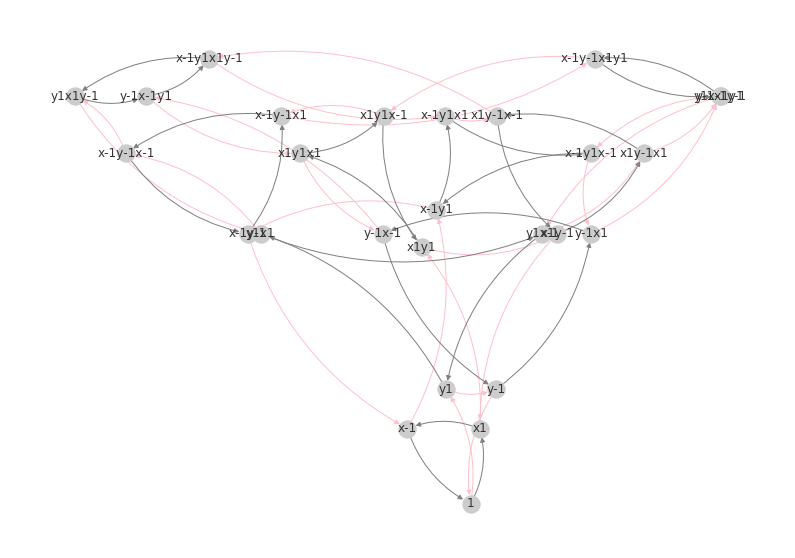

In [968]:
g, layout = cg.nx_graph(layout='radial', sortLevels=False)
for u, v, d in g.edges(data=True):
    if d['weight'] == 0:
        d['weight'] = 7
    else:
        d['weight'] = 6
layout = nx.spectral_layout(g)
for node, (a, b) in layout.items():
    if node == 'x1y1':
        layout[node] = (1.5*a, 1.5*b)
    if node == 'x-1y1':
        layout[node] = (1.5*a, 0.1*b)
plt.figure(figsize=(14,10))
draw_graph(g, layout, withLabels=True, connectionstyle='arc3, rad=0.2')

What if we try to expand this approach to $B(3,3)$ (adding a generator) or $B(2,4)$ (increasing the exponent)?

For $B(3,3)$ we get:

Size after step 1: 7
Size after step 2: 31
Size after step 3: 121
Size after step 4: 373
Size after step 5: 1065
Size after step 6: 2117
Size after step 7: 2133
Size after step 8: 2173
Size after step 9: 2185
Size after step 10: 2187
Final size: 2187


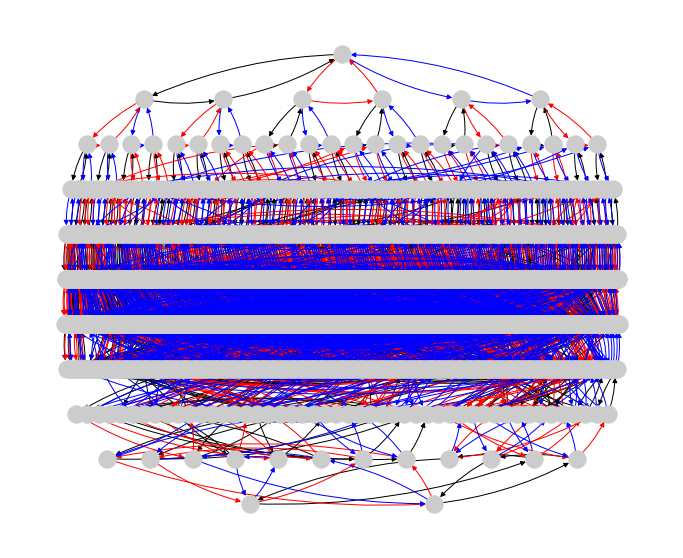

In [969]:
cg = CayleyGraph(
    generators = 'xyz', 
    relations = [
        [('x', 3)], 
        [('y', 3)], 
        [('z', 3)],
        [('x', 1), ('y', 1)]  * 3,
        [('x', 1), ('y', -1)] * 3,
        [('x', 1), ('z', 1)]  * 3,
        [('x', 1), ('z', -1)] * 3,
        [('y', 1), ('z', 1)]  * 3,
        [('y', 1), ('z', -1)] * 3,
        [('x', 1), ('y', 1), ('z', 1)]    * 3,
        [('x', 1), ('y', 1), ('z', -1)]   * 3,
        [('x', 1), ('y', -1), ('z', 1)]   * 3,
        [('x', -1), ('y', 1), ('z', 1)]   * 3,
        [('x', 1), ('y', -1), ('z', -1)]  * 3,
        [('x', -1), ('y', 1), ('z', -1)]  * 3,
        [('x', -1), ('y', -1), ('z', 1)]  * 3,
        [('x', -1), ('y', -1), ('z', -1)] * 3,
        [('x', 1), ('z', 1), ('y', 1)]    * 3,
        [('x', 1), ('z', 1), ('y', -1)]   * 3,
        [('x', 1), ('z', -1), ('y', 1)]   * 3,
        [('x', -1), ('z', 1), ('y', 1)]   * 3,
        [('x', 1), ('z', -1), ('y', -1)]  * 3,
        [('x', -1), ('z', 1), ('y', -1)]  * 3,
        [('x', -1), ('z', -1), ('y', 1)]  * 3,
        [('x', -1), ('z', -1), ('y', -1)] * 3,
    ],
)

counter = 0
while cg.extend_nodes():
    while cg.prune_nodes(): pass
    counter += 1
    print(f'Size after step { counter }: { len(cg.elements) }')
print('Final size:', len(cg.elements))
plt.figure(figsize=(12,10))
draw_cg(cg, withLabels=False)

Unfortunately the graph is a little too complex to effectively visualize, but we have shown that $B(3,3)$ is a finite group of at most $2187 = 3^7$ elements. 

Now let's try $B(2,4)$:

Size after step 1: 5
Size after step 2: 15
Size after step 3: 39
Size after step 4: 95
Size after step 5: 213
Size after step 6: 464
Size after step 7: 950
Size after step 8: 1629
Size after step 9: 2508
Size after step 10: 3442
Size after step 11: 3881
Size after step 12: 4082
Size after step 13: 4090
Size after step 14: 4092
Size after step 15: 4096
Size after step 16: 4096
Final size: 4096


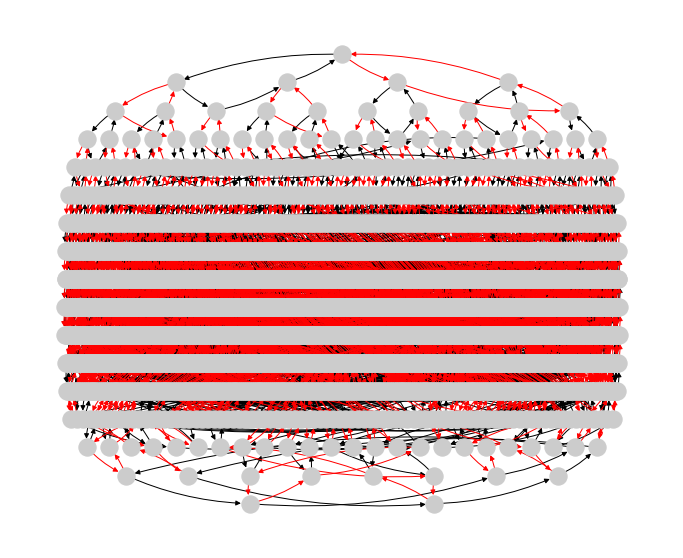

In [975]:
cg = CayleyGraph(
    generators = 'xy', 
    relations = [
        [('x', 4)], 
        [('y', 4)], 
        [('x', 1), ('y', 1)]  * 4,
        [('x', 1), ('y', -1)] * 4,
        [('x', 1), ('y', 2)]  * 4,
        [('x', 2), ('y', 1)]  * 4,
        [('x', 2), ('y', -1)] * 4,
        [('x', 2), ('y', 2)]  * 4,
        [('x', 1), ('y', 1), ('x', 1), ('y', -1)]  * 4,
        [('x', 1), ('y', 1), ('x', -1), ('y', 1)]  * 4,
        [('x', 1), ('y', 1), ('x', -1), ('y', -1)] * 4,
        [('x', 1), ('y', 1), ('x', 1), ('y', 2)]  * 4,
        [('x', 1), ('y', 1), ('x', 2), ('y', 1)]  * 4,
        [('x', 1), ('y', 1), ('x', 2), ('y', 2)]  * 4,
    ],
)

counter = 0
while cg.extend_nodes():
    while cg.prune_nodes(): pass
    counter += 1
    print(f'Size after step { counter }: { len(cg.elements) }')
print('Final size:', len(cg.elements))
plt.figure(figsize=(12,10))
draw_cg(cg, withLabels=False)

Trying to understand/visualize this graph would take a bit more work, but still we've shown that $B(2,4)$ is finite with size at most $4096 = 2^{12}$.

What about $B(2,5)$? In fact, $B(2,5)$ is an open case. We do know that *if* it's finite, its order is $5^{34}$ - certainly too large to compute by the same method we used for $B(2,3)$, $B(3,3)$, and $B(2,4)$.

### A shortcut: normal subgroups and quotient groups

However, there may be hope if we use a kind of shortcut via *quotient groups*. A quotient group is where we take a group $G$ and divide out some "factor" $N$ to get a smaller group $H = G/N$. This "factor" $N$ is actually a *subgroup* of $G$ - that is, $N$ is a subset of elements of $G$ which is itself a group. So $N$ contains $1$, it contains the inverses of all its elements, and if you multiply two elements in $N$, you always get back an element of $N$. A key fact is that if $N$ and $G/N$ are finite, then so is $G$: $|G| = |G/N| \cdot |N|$. This gives us a way to show $G$ is finite: show that its quotient by a finite normal subgroup is finite.

But it's not enough just to be a subgroup if we want to take the quotient. To do that, we must impose the following criterion on the subgroup $N$:

1. For any element $g$ in $G$, and any element $n$ in $N$, $gng^{-1}$ is in $N$.

If $N$ is a subgroup and $N$ satisfies criterion (1), then we call $N$ a *normal subgroup*. The criterion may seem strange, but it turns out it's exactly what we need to form the quotient group $G/N$.

How can we compute the size of the quotient group from a presentation of $G$? The quotient group $G/N$ is what we get if we set all the elements of $N$ to be $1$. In terms of presentations, suppose that we discovered $G$ has a normal subgroup $N$, and that $N$ is generated by the elements $n_1, ... , n_k$. Then, if we *add* the relations $n_1 = ... = n_k = 1$ to our presentation for $G$, we get a presentation of $G/N$. So it's easy to move from a presentation for $G$ to a presentation of $G/N$. 

Here's an example: in Burnside's 1902 paper on this problem, he found that $B(2,4)$ has a normal subgroup $N$ of order $2^3 = 8$, generated by the 3 elements $(x^2y^2)^2$, $x(x^2y^2)^2x^{-1}$, and $y(x^2y^2)^2y^{-1}$. Therefore we can form the presentation: 

$B(2,4)/N = \left\langle x, y \ \big| \ (x^2y^2)^2 = 1, \ x(x^2y^2)^2x^{-1} = 1, \ y(x^2y^2)^2y^{-1} = 1, \ g^4 = 1 \ \text{for all elements g} \right\rangle$

In fact two of these relations are redundant; if $(x^2y^2)^2 = 1$ then automatically $x(x^2y^2)^2x^{-1} = x1x^{-1} = 1$ and similarly $y(x^2y^2)^2y^{-1} = y1y^{-1} = 1$. So instead, we can use the presentation:

$B(2,4)/N = \left\langle x, y \ \big| \ (x^2y^2)^2 = 1, \ g^4 = 1 \ \text{for all elements g} \right\rangle$

But we don't have to stop here. Within B(2,4)/N, there is a normal subgroup $K$ generated by the 3 elements $x^2$, $yx^2y^{-1}$, and $xyx^2y^{-1}x^{-1}$. Again the group has order $2^3 = 8$; to form a presentation for $B((2,4)/N)/K$, it suffices to set $x^2 = 1$:

$(B(2,4)/N)/K = \left\langle x, y \ \big| \ (x^2y^2)^2 = 1, \ x^2 = 1, \ g^4 = 1 \ \text{for all elements g} \right\rangle$

Note that when $x^2 = 1$, the relation $(x^2y^2)^2 = 1$ becomes redundant since $(x^2y^2)^2 = (y^2)^2 = y^4 = 1$.
So, we can now compute the following quotient group:

$(B(2,4)/N)/K = \left\langle x, y \ \big| \ x^2 = 1, \ g^4 = 1 \ \text{for all elements g} \right\rangle$

Size after step 1: 4
Size after step 2: 9
Size after step 3: 17
Size after step 4: 28
Size after step 5: 41
Size after step 6: 56
Size after step 7: 62
Size after step 8: 64
Final size: 64


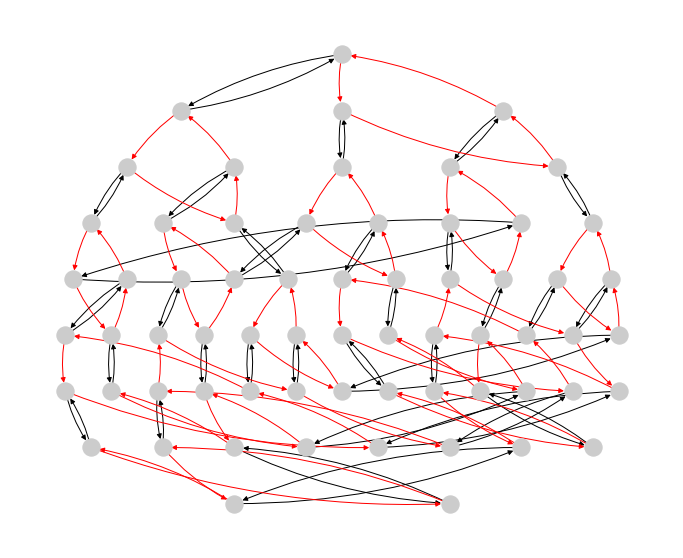

In [974]:
cg = CayleyGraph(
    generators = 'xy', 
    relations = [
        [('x', 2)], 
        [('y', 4)], 
        [('x', 1), ('y', 1)]  * 4,
        [('x', 1), ('y', -1)] * 4,
        [('x', 1), ('y', 2)]  * 4,
        [('x', 2), ('y', 1)]  * 4,
        [('x', 2), ('y', -1)] * 4,
    ],
)

counter = 0
while cg.extend_nodes():
    while cg.prune_nodes(): pass
    counter += 1
    print(f'Size after step { counter }: { len(cg.elements) }')
print('Final size:', len(cg.elements))
plt.figure(figsize=(12,10))
draw_cg(cg, withLabels=False)

By adding relations we greatly reduce the computation, and still obtain a finiteness proof. In particular we found that $|(G/N)/K| = 64 = 2^6$. Since $|N| = |K| = 8 = 2^3$ we have $|B(2,4)| \leq |G| = |(G/N)/K| \cdot |K| \cdot |N| = 2^6 \cdot 2^3 \cdot 2^3 = 2^{12} = 4096$, the same value we found above.

Thus, if we can discover a finite normal subgroup $N$ (preferably a large one) of $B(2,5)$ then we can compute the size of $B(2,5)/N$ instead of $B(2,5)$. This can be repeated - if we discover a normal subgroup $K$ of $B(2,5)/N$, then we can compute $(B(2,5)/N)/K$, which will be even smaller, and so on. Each time we divide out a normal subgroup, we remove a factor from the size of the group.